In [18]:
#import plotting dependencies
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates


#import data analysis dependencies
import pandas as pd
import numpy as np

#import SQL Alchemy dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [19]:
#create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [20]:
#prepare and reflect the database
Base = automap_base()
Base.prepare(engine, reflect=True)

In [21]:
conn = engine.connect()
inspector = inspect(engine)

In [22]:
Base.classes.keys()

['measurement', 'station']

In [25]:
#save each table as their own reference classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
session = Session(engine)

In [27]:
#query the database for a years worth of precipitation data. Focus on most recent.
precipitation_analysis_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()

In [30]:
#set index equal to date
pre_df = pd.DataFrame(precipitation_analysis_1)

In [31]:
pre_df['date'] = pd.to_datetime(pre_df['date'])

In [33]:
prec_df = pre_df.set_index('date')
prec_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


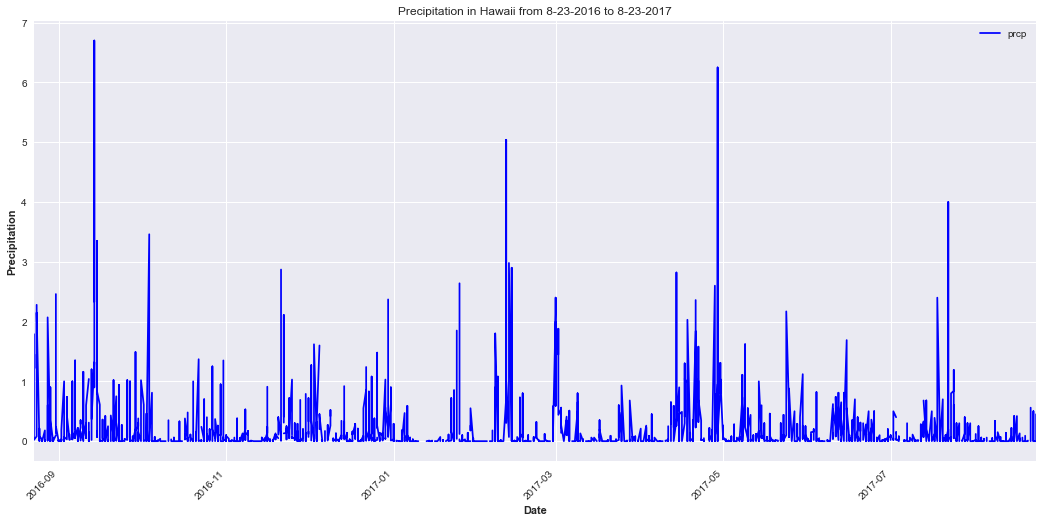

In [34]:
#plot the data
prec_plot = prec_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title("Precipitation in Hawaii from 8-23-2016 to 8-23-2017")
plt.show()

In [35]:
#show short statistical analysis for data
prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
## Start Station Analysis
station_num = session.query(Station.id).count()
station_num

9

In [37]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
most_active_station = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [38]:
#Waihee 837.5 has the highest number of observations
most_active_station

[('USC00519281', 'WAIHEE 837.5, HI US', 16632),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 16344),
 ('USC00513117', 'KANEOHE 838.1, HI US', 16254),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 16014),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 15672),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 13212),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 11874),
 ('USC00517948', 'PEARL CITY, HI US', 8232),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 3066)]

In [39]:
waihee_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()

In [40]:
len(waihee_tobs)

352

In [41]:

print(waihee_tobs[0][0])

77.0


In [42]:
temperatures = [temp[0] for temp in waihee_tobs]

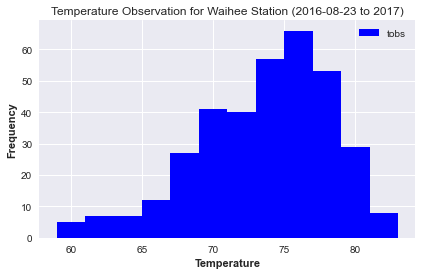

In [43]:
plt.hist(temperatures, bins=12, color='b')
plt.title("Temperature Observation for Waihee Station (2016-08-23 to 2017)")
plt.ylabel('Frequency', weight='bold')
plt.xlabel('Temperature', weight='bold')
labels = ['tobs']
plt.legend(labels)

In [44]:
def calc_temps(start, end):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    avg_temp = np.mean(temperatures)
    lowest_temp = min(temperatures)
    highest_temp = max(temperatures)
    

    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='salmon')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.show()

In [45]:

columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

id
station
date
prcp
tobs


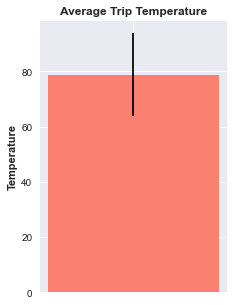

In [46]:
calc_temps(start="2017-08-07", end="2017-08-23")

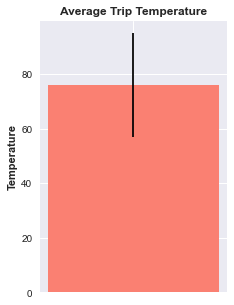

In [47]:
calc_temps(start="2013-08-12", end="2013-09-12")